In [17]:
import pandas as pd
import plotly.express as px

ipl = pd.read_csv("../data/cleaned/ipl_cleaned.csv")
ipl.head()

,id,innings,overs,ball_number,batter,bowler,non_striker,extra_type,batsman_run,extras_run,...,non_boundary,iswicket_delivery,player_out,dismisal_kind,fielders_involved,batting_team,date,venue,team1,team2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,rajasthan royals,2022-05-29,"Narendra Modi Stadium, Ahmedabad",rajasthan royals,gujarat titans
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,0,0,NaN,NaN,NaN,rajasthan royals,2022-05-29,"Narendra Modi Stadium, Ahmedabad",rajasthan royals,gujarat titans
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,0,0,NaN,NaN,NaN,rajasthan royals,2022-05-29,"Narendra Modi Stadium, Ahmedabad",rajasthan royals,gujarat titans
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,rajasthan royals,2022-05-29,"Narendra Modi Stadium, Ahmedabad",rajasthan royals,gujarat titans
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,rajasthan royals,2022-05-29,"Narendra Modi Stadium, Ahmedabad",rajasthan royals,gujarat titans


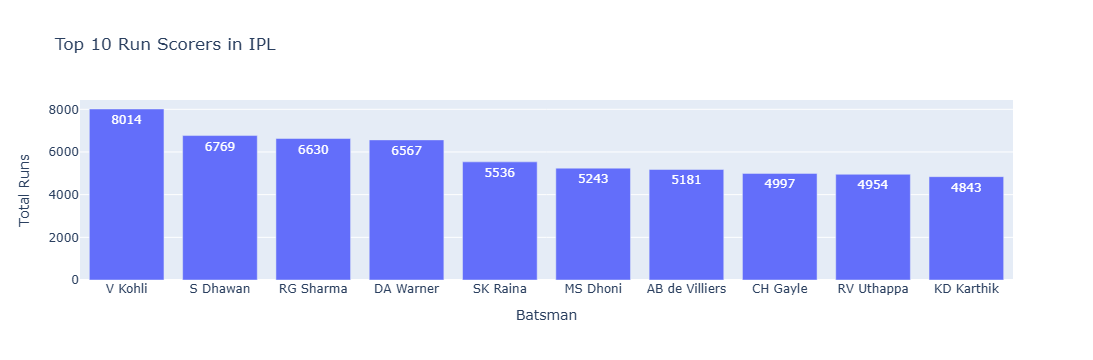

In [18]:
top_batsmen = (
    ipl.groupby("batter")["batsman_run"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    top_batsmen,
    x="batter",
    y="batsman_run",
    title="Top 10 Run Scorers in IPL",
    labels={"batsman_run": "Total Runs", "batter": "Batsman"},
    text="batsman_run"
)

fig.show()

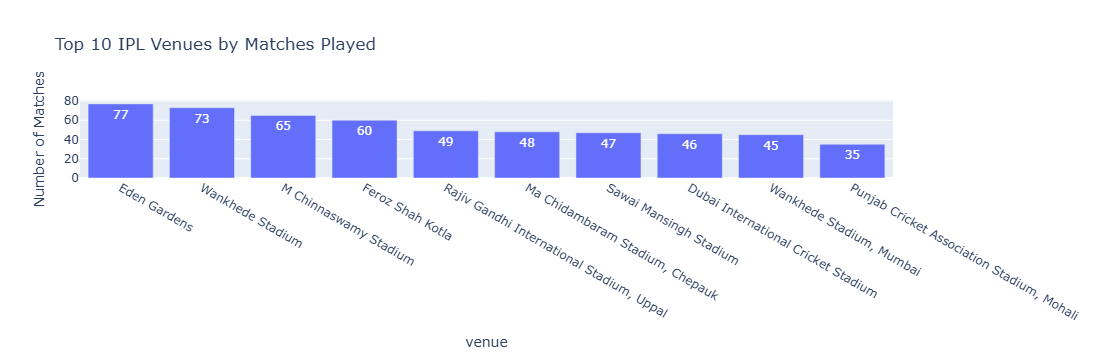

In [19]:
venue_matches = (
    ipl.groupby("venue")["id"]
    .nunique()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    venue_matches,
    x="venue",
    y="id",
    title="Top 10 IPL Venues by Matches Played",
    labels={"id": "Number of Matches"},
    text="id"
)

fig.show()


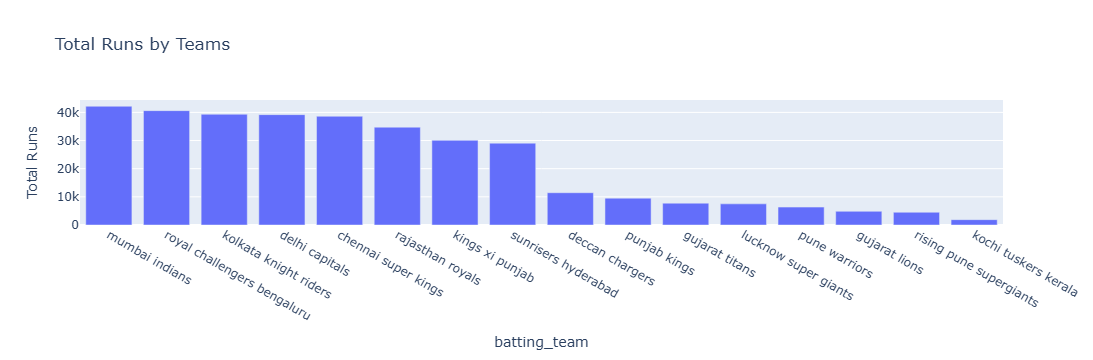

In [20]:
team_runs = (
    ipl.groupby("batting_team")["total_run"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

fig = px.bar(
    team_runs,
    x="batting_team",
    y="total_run",
    title="Total Runs by Teams",
    labels={"total_run": "Total Runs"},
)

fig.show()


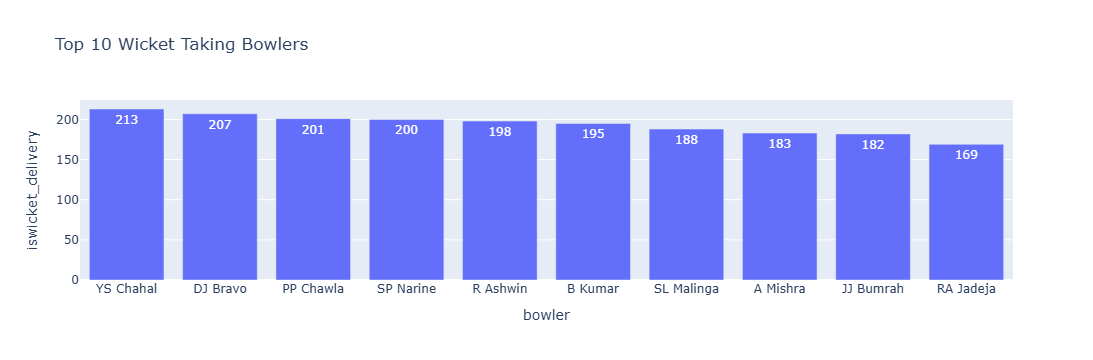

In [21]:
top_bowlers = (
    ipl.groupby("bowler")["iswicket_delivery"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    top_bowlers,
    x="bowler",
    y="iswicket_delivery",
    title="Top 10 Wicket Taking Bowlers",
    labels={"is_wicket": "Total Wickets"},
    text="iswicket_delivery"
)

fig.show()
